<a href="https://colab.research.google.com/github/UnsignedArduino/Chessbot/blob/main/src/train/train_board_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ultralytics==8.3.40 roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 896.9/896.9 kB 25.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.9/80.9 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 4.8 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


In [ ]:
ROBOFLOW_WORKSPACE = "unsignedarduino-9db8i"  # @param {"type":"string"}
ROBOFLOW_PROJECT = "chessbot-boards"  # @param {"type":"string"}
DATASET_VERSION = 2  # @param {"type":"integer","placeholder":"1, 2, 3..."}

from google.colab import userdata
from roboflow import Roboflow

rf = Roboflow(api_key=userdata.get("ROBOFLOW_API_KEY"))
project = rf.workspace(ROBOFLOW_WORKSPACE).project(ROBOFLOW_PROJECT)
version = project.version(DATASET_VERSION)
dataset = version.download("yolov11")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Chessbot-Boards-2 in yolov11:: 100%|██████████| 498/498 [00:00<00:00, 1643.56it/s]


In [ ]:
from pathlib import Path
from ultralytics import YOLO

model = YOLO("yolo11n-seg.pt")

yaml_path = Path(dataset.location) / "data.yaml"

results = model.train(data=yaml_path, epochs=50, imgsz=640, plots=True)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 5.90M/5.90M [00:00<00:00, 94.0MB/s]


Ultralytics 8.3.39 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=yolo11n-seg.pt, data=/content/Chessbot-Boards-2/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=T

100%|██████████| 755k/755k [00:00<00:00, 16.9MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 94.7MB/s]


AMP: checks passed ✅


train: Scanning /content/Chessbot-Boards-2/train/labels... 213 images, 51 backgrounds, 0 corrupt: 100%|██████████| 213/213 [00:00<00:00, 2129.74it/s]

train: New cache created: /content/Chessbot-Boards-2/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


A new version of Albumentations is available: 1.4.21 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
val: Scanning /content/Chessbot-Boards-2/valid/labels... 21 images, 6 backgrounds, 0 corrupt: 100%|██████████| 21/21 [00:00<00:00, 1259.57it/s]

val: New cache created: /content/Chessbot-Boards-2/valid/labels.cache


Plotting labels to runs/segment/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 90 weight(decay=0.0), 101 weight(decay=0.0005), 100 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/segment/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       1/50      3.09G      1.405      3.923      2.894      1.702          9        640: 100%|██████████| 14/14 [00:11<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.77it/s]

                   all         21         15    0.00238          1      0.991      0.881    0.00238          1      0.991      0.946



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       2/50      3.07G     0.8054      0.938      2.004      1.237         13        640: 100%|██████████| 14/14 [00:06<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.36it/s]

                   all         21         15    0.00238          1      0.995      0.868    0.00238          1      0.995      0.931



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       3/50      3.05G     0.7741     0.7011      1.456      1.177         11        640: 100%|██████████| 14/14 [00:04<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.25it/s]

                   all         21         15          1      0.412      0.673       0.59          1      0.412      0.666      0.566



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       4/50      3.06G     0.7868     0.5628      1.285      1.176          7        640: 100%|██████████| 14/14 [00:05<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.14it/s]

                   all         21         15          1      0.412      0.673       0.59          1      0.412      0.666      0.566



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.99G     0.7908     0.5664      1.235      1.187         11        640: 100%|██████████| 14/14 [00:04<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.03it/s]

                   all         21         15   0.000476        0.2     0.0169    0.00395   0.000635      0.267     0.0177     0.0065



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       6/50      3.11G      0.814     0.6993      1.176       1.22         13        640: 100%|██████████| 14/14 [00:04<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.12it/s]

                   all         21         15       0.61      0.533      0.539      0.285      0.604      0.533      0.549      0.301



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       7/50      3.07G     0.8206     0.7539      1.163      1.212          7        640: 100%|██████████| 14/14 [00:06<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.02it/s]

                   all         21         15      0.928      0.933      0.939      0.771      0.928      0.933      0.939      0.846



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       8/50         3G     0.8316     0.7045      1.111      1.195          9        640: 100%|██████████| 14/14 [00:04<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.59it/s]

                   all         21         15      0.937      0.988       0.97      0.782      0.937      0.988       0.97      0.914



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       9/50      3.06G     0.8444     0.6521      1.055       1.21         14        640: 100%|██████████| 14/14 [00:04<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.05it/s]

                   all         21         15      0.948      0.933      0.985      0.793      0.948      0.933      0.985      0.784



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      10/50      3.08G     0.8053     0.5785     0.9532      1.183         12        640: 100%|██████████| 14/14 [00:05<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.24it/s]

                   all         21         15      0.631      0.867      0.769      0.491      0.631      0.867      0.766       0.56



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      11/50      3.06G     0.8055     0.5433     0.9214      1.185          8        640: 100%|██████████| 14/14 [00:07<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.64it/s]

                   all         21         15      0.697      0.933       0.84      0.616      0.697      0.933       0.84      0.646



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      12/50         3G     0.7553     0.6417     0.8417      1.114         10        640: 100%|██████████| 14/14 [00:06<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.03it/s]

                   all         21         15      0.995      0.933      0.954      0.866      0.995      0.933      0.935      0.911



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      13/50      3.06G     0.7528     0.6032     0.8556      1.131          8        640: 100%|██████████| 14/14 [00:04<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.34it/s]

                   all         21         15      0.993      0.933      0.991       0.82      0.993      0.933      0.991      0.862



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      14/50      3.02G     0.7297     0.4723     0.7972      1.122          6        640: 100%|██████████| 14/14 [00:05<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.60it/s]

                   all         21         15      0.957          1      0.995      0.907      0.957          1      0.995      0.955



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      15/50         3G     0.6859     0.5607     0.7494      1.082          8        640: 100%|██████████| 14/14 [00:04<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.38it/s]

                   all         21         15      0.993          1      0.995      0.899      0.993          1      0.995      0.982



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      16/50      3.06G     0.6973      0.519     0.7219      1.104         14        640: 100%|██████████| 14/14 [00:04<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.30it/s]

                   all         21         15      0.972      0.933      0.982      0.842      0.972      0.933      0.982      0.916



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      17/50      3.05G     0.6711     0.5815     0.7003      1.078         11        640: 100%|██████████| 14/14 [00:06<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.53it/s]

                   all         21         15      0.994          1      0.995      0.942      0.994          1      0.995      0.995



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      18/50      3.02G     0.6463     0.5754     0.6815      1.063         11        640: 100%|██████████| 14/14 [00:04<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.45it/s]

                   all         21         15      0.986      0.933      0.988      0.863      0.986      0.933      0.988      0.889



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      19/50      3.11G     0.6501     0.5794     0.6328      1.065         11        640: 100%|██████████| 14/14 [00:04<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.34it/s]

                   all         21         15      0.999          1      0.995      0.966      0.999          1      0.995      0.995



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      20/50      3.02G     0.7142     0.5411     0.6671      1.114         12        640: 100%|██████████| 14/14 [00:06<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.89it/s]

                   all         21         15      0.967          1      0.995      0.924      0.967          1      0.995      0.995



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      21/50      3.04G     0.6555     0.5054     0.6223      1.083          8        640: 100%|██████████| 14/14 [00:04<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.47it/s]

                   all         21         15      0.984          1      0.995       0.98      0.984          1      0.995      0.995



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      22/50      3.07G     0.6382     0.4966     0.6078      1.068          9        640: 100%|██████████| 14/14 [00:04<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.58it/s]

                   all         21         15      0.996          1      0.995      0.978      0.996          1      0.995      0.989



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      23/50      3.02G     0.5898     0.3983     0.5529      1.067          7        640: 100%|██████████| 14/14 [00:05<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.48it/s]

                   all         21         15      0.997          1      0.995      0.989      0.997          1      0.995      0.995



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      24/50      3.05G     0.6187     0.5394     0.5711       1.06         10        640: 100%|██████████| 14/14 [00:06<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.92it/s]

                   all         21         15      0.997          1      0.995      0.995      0.997          1      0.995      0.984



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      25/50      3.01G     0.5674     0.4683     0.5022      1.024          9        640: 100%|██████████| 14/14 [00:06<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.20it/s]

                   all         21         15      0.994          1      0.995      0.959      0.994          1      0.995      0.989



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      26/50      3.06G     0.6263     0.5433     0.5611      1.056          9        640: 100%|██████████| 14/14 [00:04<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.94it/s]

                   all         21         15      0.995          1      0.995      0.985      0.995          1      0.995      0.995



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      27/50      3.06G     0.6577     0.4529     0.5696      1.057          8        640: 100%|██████████| 14/14 [00:05<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.10it/s]

                   all         21         15      0.996          1      0.995      0.958      0.996          1      0.995      0.995



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      28/50      3.04G     0.5865     0.5023     0.5149      1.048          9        640: 100%|██████████| 14/14 [00:06<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.75it/s]

                   all         21         15      0.996          1      0.995       0.92      0.996          1      0.995      0.995



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      29/50      3.05G      0.604     0.5108     0.5303      1.063          6        640: 100%|██████████| 14/14 [00:04<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.66it/s]

                   all         21         15      0.996          1      0.995      0.939      0.996          1      0.995      0.995



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      30/50      3.05G     0.5417     0.4153     0.4887      1.013         10        640: 100%|██████████| 14/14 [00:06<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.93it/s]

                   all         21         15      0.993          1      0.995      0.995      0.993          1      0.995      0.995



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      31/50      3.08G     0.5825     0.4737     0.5059      1.037          6        640: 100%|██████████| 14/14 [00:04<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.39it/s]

                   all         21         15      0.985          1      0.995      0.969      0.985          1      0.995      0.995



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      32/50      3.06G     0.5132     0.4267     0.4516       1.01          9        640: 100%|██████████| 14/14 [00:04<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.87it/s]

                   all         21         15      0.997          1      0.995      0.978      0.997          1      0.995      0.977



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      33/50      3.03G     0.5366     0.4807     0.4663      1.036         16        640: 100%|██████████| 14/14 [00:06<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.54it/s]

                   all         21         15      0.997          1      0.995      0.917      0.997          1      0.995      0.995



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      34/50      3.06G     0.5349     0.4349       0.47      1.017          6        640: 100%|██████████| 14/14 [00:04<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.02it/s]

                   all         21         15      0.996          1      0.995      0.995      0.996          1      0.995      0.989



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      35/50         3G     0.5226      0.445     0.4577      1.011          9        640: 100%|██████████| 14/14 [00:05<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.04it/s]

                   all         21         15      0.996          1      0.995      0.989      0.996          1      0.995      0.995



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      36/50      3.06G     0.5459      0.449     0.4716      1.022          8        640: 100%|██████████| 14/14 [00:04<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.58it/s]

                   all         21         15      0.996          1      0.995      0.995      0.996          1      0.995      0.995



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      37/50      3.06G      0.495     0.4229     0.4306      0.996          6        640: 100%|██████████| 14/14 [00:04<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.09it/s]

                   all         21         15      0.997          1      0.995      0.972      0.997          1      0.995      0.995



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      38/50      3.06G      0.513     0.4141     0.4414      1.006          7        640: 100%|██████████| 14/14 [00:06<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.16it/s]

                   all         21         15      0.997          1      0.995      0.989      0.997          1      0.995      0.995



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      39/50      3.06G     0.4827     0.4189     0.4151     0.9912         11        640: 100%|██████████| 14/14 [00:04<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.34it/s]

                   all         21         15      0.997          1      0.995      0.979      0.997          1      0.995      0.995



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      40/50      3.02G     0.5357     0.4474     0.4486      1.046          6        640: 100%|██████████| 14/14 [00:05<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.38it/s]

                   all         21         15      0.997          1      0.995      0.981      0.997          1      0.995      0.995


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      41/50      3.06G     0.3192     0.3264     0.4521      0.904          2        640: 100%|██████████| 14/14 [00:07<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.69it/s]

                   all         21         15      0.997          1      0.995      0.982      0.997          1      0.995      0.995



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      42/50      3.06G      0.331     0.3142      0.401     0.9208          4        640: 100%|██████████| 14/14 [00:04<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.29it/s]

                   all         21         15      0.997          1      0.995      0.976      0.997          1      0.995      0.995



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      43/50      3.06G     0.3131     0.3049     0.3854     0.9168          3        640: 100%|██████████| 14/14 [00:05<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.91it/s]

                   all         21         15      0.997          1      0.995      0.989      0.997          1      0.995      0.995



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      44/50      3.03G     0.3036     0.3322     0.3577     0.8702          3        640: 100%|██████████| 14/14 [00:04<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.05it/s]

                   all         21         15      0.997          1      0.995      0.995      0.997          1      0.995      0.995



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      45/50      3.06G     0.2944     0.3073     0.3555     0.9123          4        640: 100%|██████████| 14/14 [00:04<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.16it/s]

                   all         21         15      0.997          1      0.995      0.985      0.997          1      0.995      0.995



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      46/50      3.06G      0.293     0.3105     0.3452     0.8993          4        640: 100%|██████████| 14/14 [00:05<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.48it/s]

                   all         21         15      0.996          1      0.995      0.995      0.996          1      0.995      0.995



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      47/50      3.06G     0.2768     0.2941     0.3218     0.8772          3        640: 100%|██████████| 14/14 [00:05<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.06it/s]

                   all         21         15      0.996          1      0.995      0.995      0.996          1      0.995      0.995



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      48/50      3.06G     0.2618     0.3262     0.3111     0.8701          3        640: 100%|██████████| 14/14 [00:06<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.77it/s]

                   all         21         15      0.996          1      0.995      0.995      0.996          1      0.995      0.995



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      49/50      3.06G     0.2525      0.301     0.3047     0.8478          2        640: 100%|██████████| 14/14 [00:03<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.50it/s]

                   all         21         15      0.997          1      0.995      0.995      0.997          1      0.995      0.995



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      50/50      3.06G      0.256     0.2949     0.3025      0.852          5        640: 100%|██████████| 14/14 [00:04<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.32it/s]

                   all         21         15      0.997          1      0.995      0.995      0.997          1      0.995      0.995



50 epochs completed in 0.094 hours.
Optimizer stripped from runs/segment/train/weights/last.pt, 6.0MB
Optimizer stripped from runs/segment/train/weights/best.pt, 6.0MB

Validating runs/segment/train/weights/best.pt...
Ultralytics 8.3.39 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n-seg summary (fused): 265 layers, 2,834,763 parameters, 0 gradients, 10.2 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.09it/s]


                   all         21         15      0.997          1      0.995      0.995      0.997          1      0.995      0.995
Speed: 0.2ms preprocess, 3.2ms inference, 0.0ms loss, 1.9ms postprocess per image
Results saved to runs/segment/train


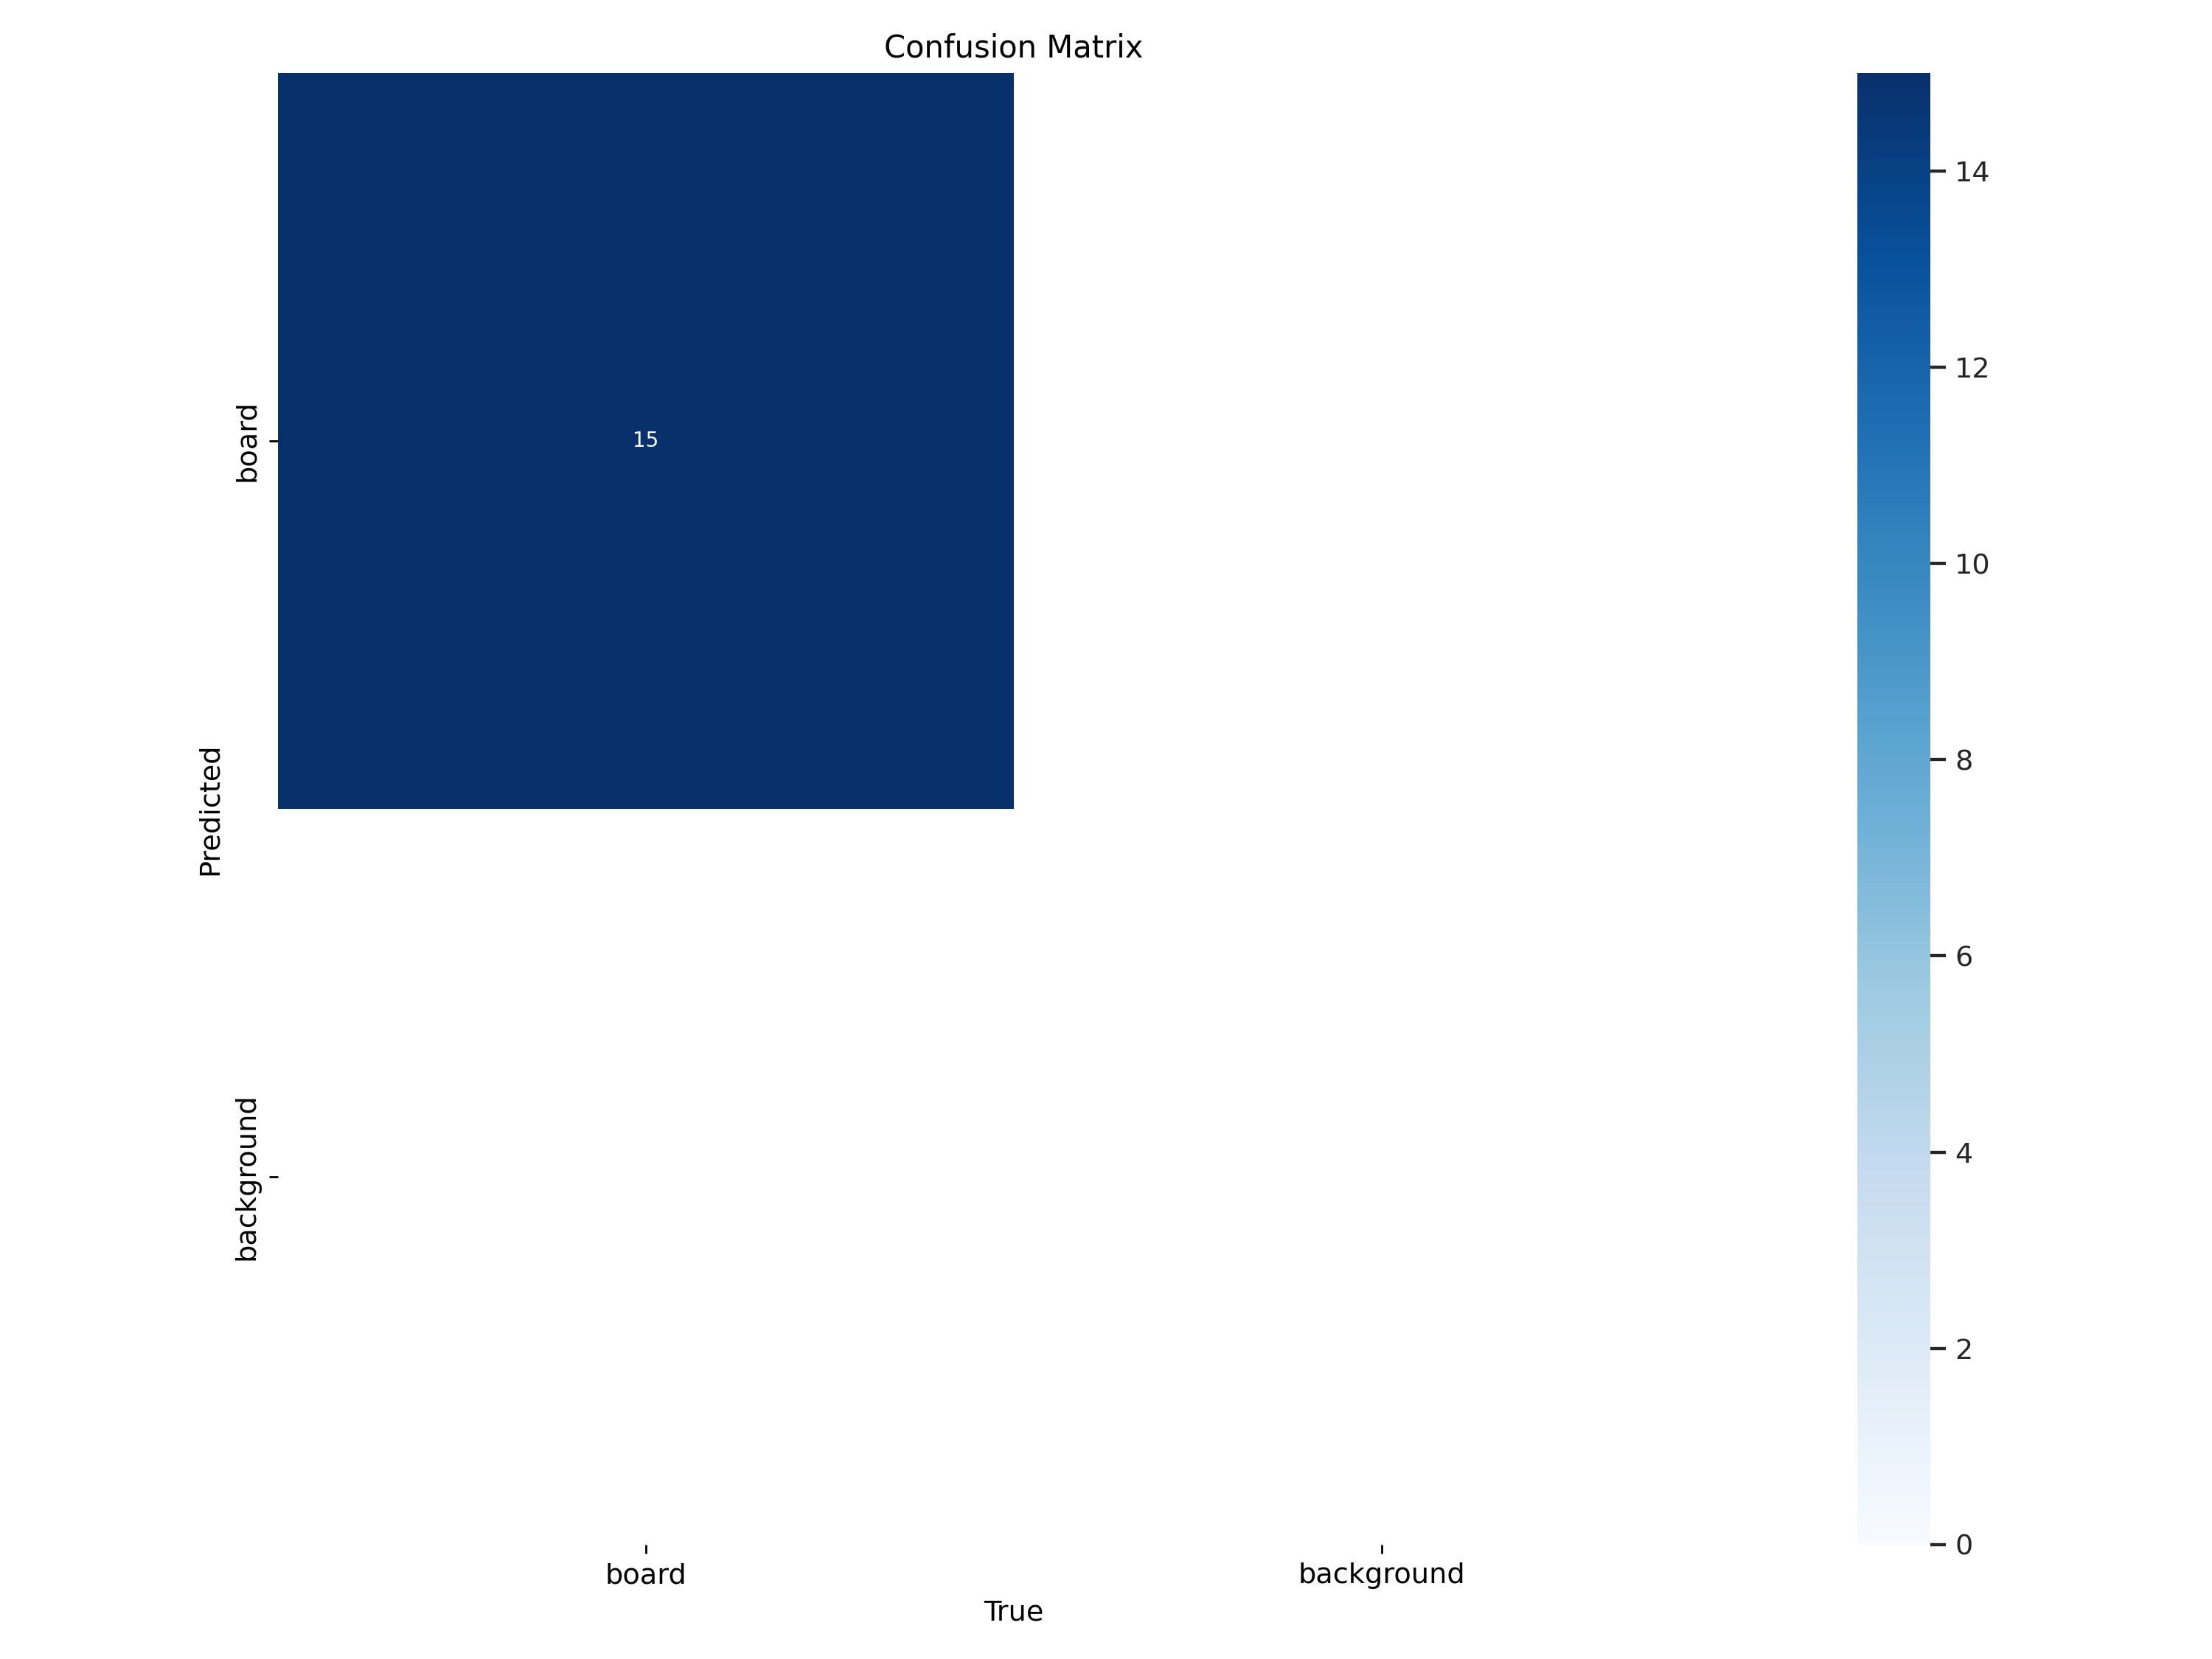

In [ ]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'runs/segment/train/confusion_matrix.png', width=600)

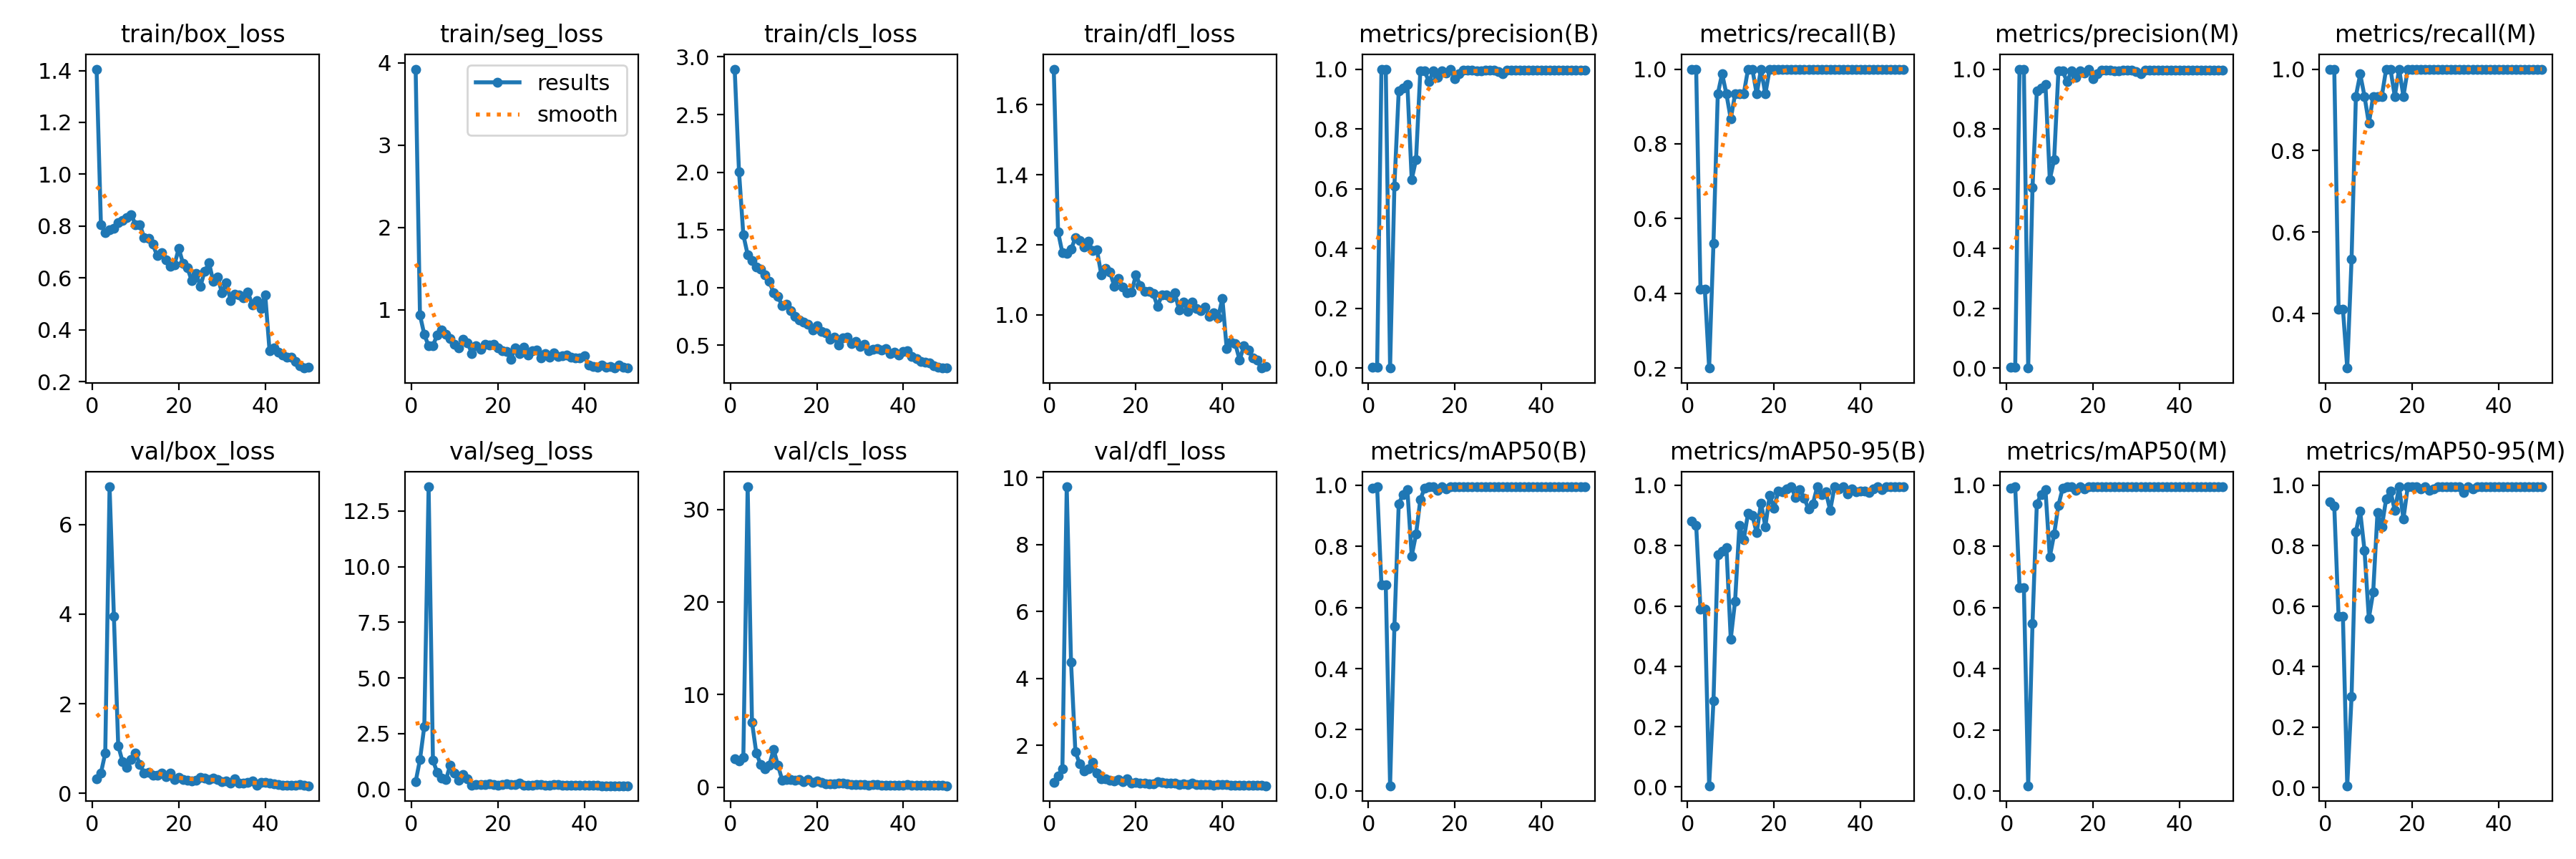

In [ ]:
IPyImage(filename=f'runs/segment/train/results.png', width=600)

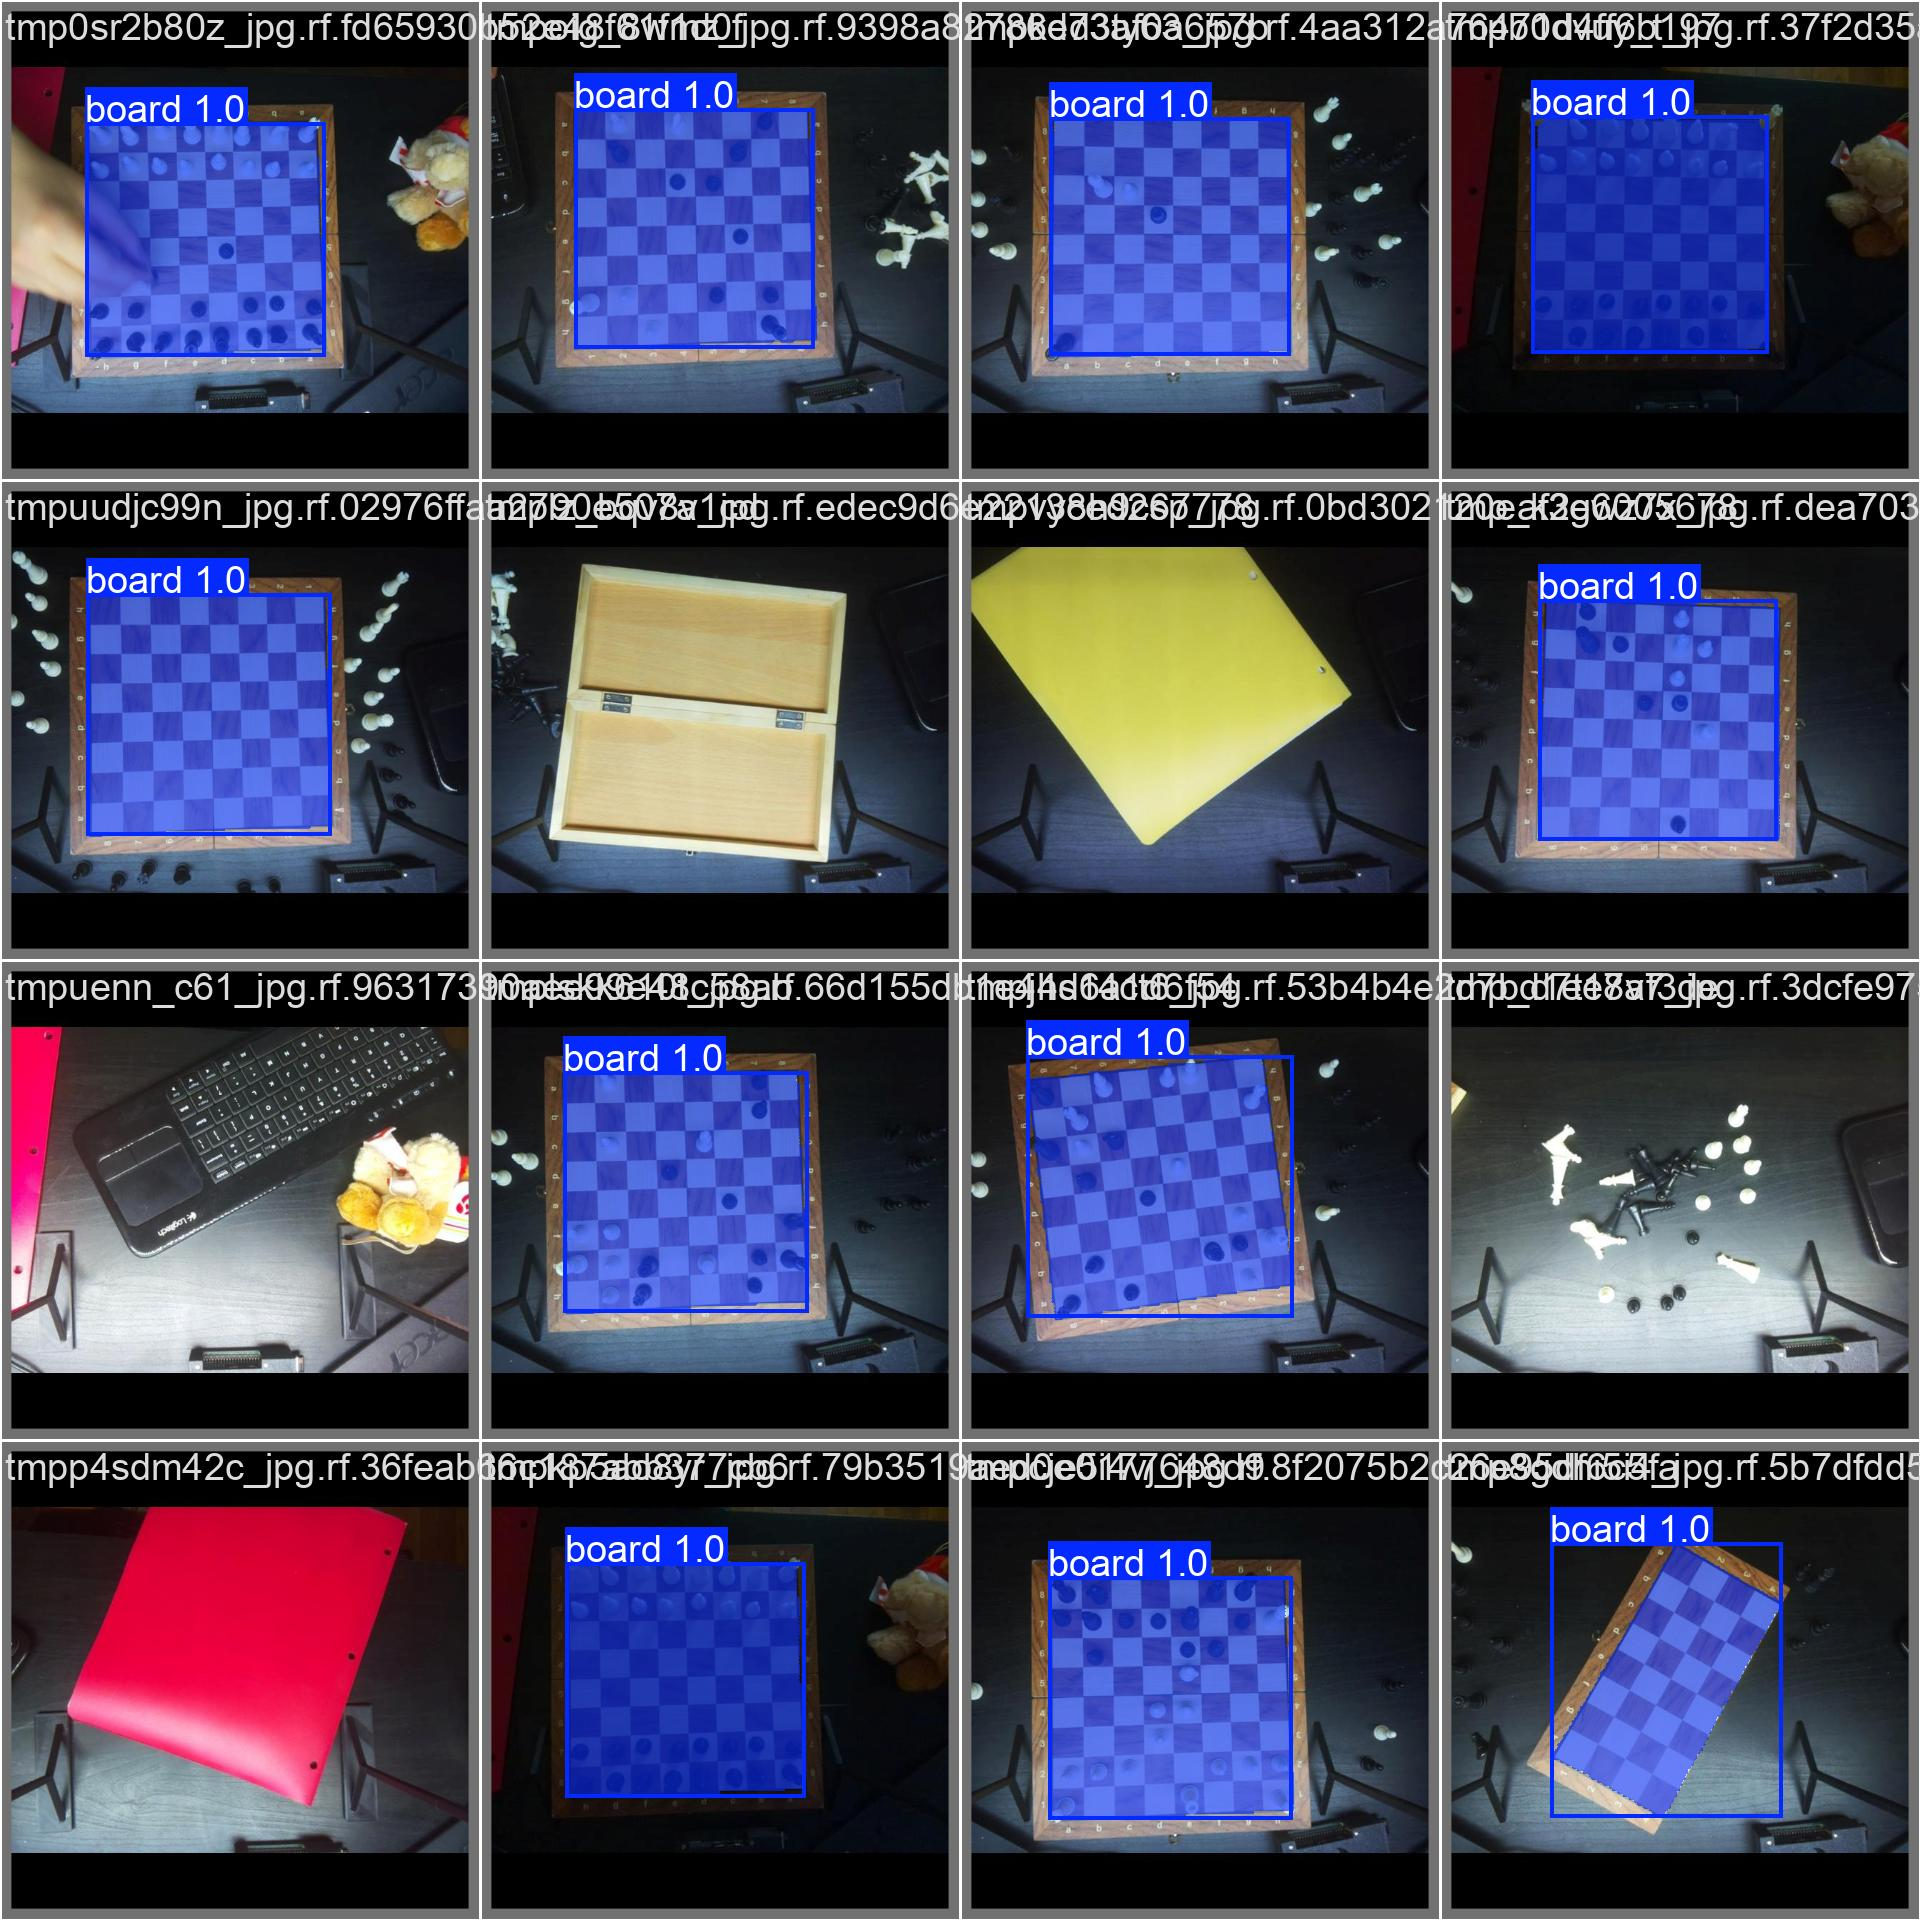

In [ ]:
IPyImage(filename=f'runs/segment/train/val_batch0_pred.jpg', width=600)

In [ ]:
project.version(dataset.version).deploy(model_type="yolov11",
                                        model_path=f"runs/segment/train/")

View the status of your deployment at: https://app.roboflow.com/unsignedarduino-9db8i/chessbot-boards/2
Share your model with the world at: https://universe.roboflow.com/unsignedarduino-9db8i/chessbot-boards/model/2
